# KNN


In [ ]:
#import packages 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

#read dataset 
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
df = df.drop_duplicates()

In [ ]:
sum(df.duplicated())

0

In [ ]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Gender=le.fit_transform(df['Gender'])
Age=df['Age']
Height=df['Height']
Weight=df['Weight']
Family_history=le.fit_transform(df['family_history_with_overweight'])
FAVC=le.fit_transform(df['FAVC'])
FCVC=df['FCVC']
NCP=df['NCP']
CAEC=le.fit_transform(df['CAEC'])
SMOKE=le.fit_transform(df['SMOKE'])
CH2O=df['CH2O']
SCC=le.fit_transform(df['SCC'])
FAF=df['FAF'] 
TUE=df['TUE']
CALC=le.fit_transform(df['CALC'])
MTRANS=le.fit_transform(df['MTRANS'])
NObeyesdad=le.fit_transform(df['NObeyesdad'])

In [ ]:
data={
    "Gender":Gender,
    "Age":Age,
    "Height":Height,
    "Weight":Weight,
    "family_history":Family_history,
    "FAVC":FAVC,
    "FCVC":FCVC,
    "NCP":NCP,
    "CAEC":CAEC,
    "SMOKE":SMOKE,
    "CH2O":CH2O,
    "SCC":SCC,
    "FAF":FAF,
    "TUE":TUE,
    "CALC":CALC,
    "MTRANS":MTRANS,
    "NObeyesdad":NObeyesdad
}

In [ ]:
dataset=pd.DataFrame(data)
dataset.head()
#dataset.info()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


In [ ]:
#Melihat informasi data 
dataset.info()

#Variabel independen untuk nilai x
x = dataset.drop(["NObeyesdad"], axis = 1)
x.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2087 non-null   int64  
 1   Age             2087 non-null   float64
 2   Height          2087 non-null   float64
 3   Weight          2087 non-null   float64
 4   family_history  2087 non-null   int64  
 5   FAVC            2087 non-null   int64  
 6   FCVC            2087 non-null   float64
 7   NCP             2087 non-null   float64
 8   CAEC            2087 non-null   int64  
 9   SMOKE           2087 non-null   int64  
 10  CH2O            2087 non-null   float64
 11  SCC             2087 non-null   int64  
 12  FAF             2087 non-null   float64
 13  TUE             2087 non-null   float64
 14  CALC            2087 non-null   int64  
 15  MTRANS          2087 non-null   int64  
 16  NObeyesdad      2087 non-null   int64  
dtypes: float64(8), int64(9)
memory us

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3


In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000,2087.000000
mean,24.353090,1.702674,86.858730,2.421466,2.701179,2.004749,1.012812,0.663035
std,6.368801,0.093186,26.190847,0.534737,0.764614,0.608284,0.853475,0.608153
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.915937,1.630178,66.000000,2.000000,2.697467,1.590922,0.124505,0.000000
50%,22.847618,1.701584,83.101100,2.396265,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.769491,108.015907,3.000000,3.000000,2.466193,1.678102,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


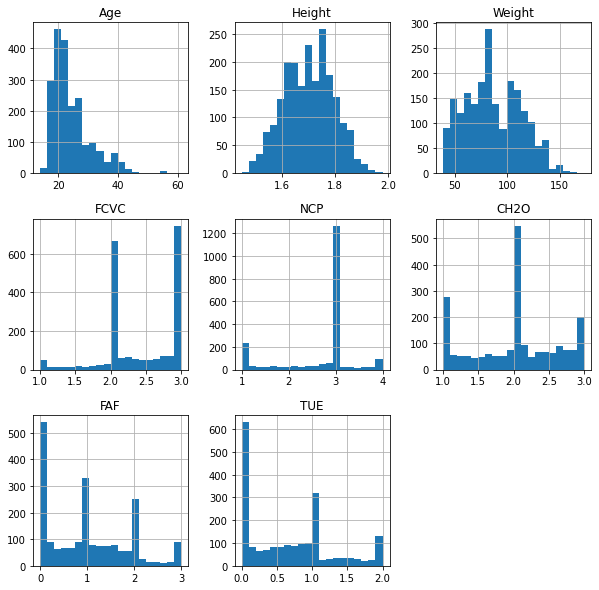

In [ ]:
df.hist(bins=20, figsize=(10,10))
plt.show()

In [ ]:
# Memasukkan variabel Y
y = []
for NObeyesdad in dataset['NObeyesdad']:
    y.append(round(NObeyesdad))

# 1. Menggunakan Data 10-90

In [ ]:
#Import split train test 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=0)

In [ ]:
#Mengubah skala data dengan mengaktifkan package dan menuliskan syntax

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Memanggil package KNN 
from sklearn.neighbors import KNeighborsClassifier

#Menampilkan hasil nilai akurasi
from sklearn.metrics import accuracy_score 

0.8660287081339713
0.8421052631578947
0.8373205741626795
0.8229665071770335
0.8325358851674641
0.8181818181818182
0.8086124401913876
0.8086124401913876
0.8086124401913876
0.8133971291866029


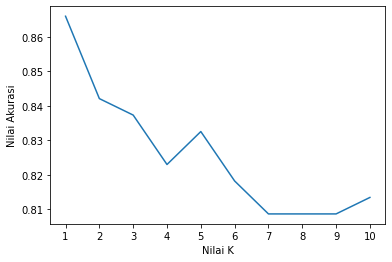

In [ ]:
from statistics import *

result = []
for i in range (1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    #Masukkan prediksi
    pred_knn = knn.predict(x_test)
    #Nilai prediksi 
    acurate = accuracy_score(y_test, pred_knn)
    print(acurate)
    result.append(acurate)
plt.plot(result)
plt.ylabel("Nilai Akurasi")
plt.xlabel("Nilai K")
plt.xticks(np.arange(10),('1','2','3','4','5','6','7','8','9','10'))
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#Menentukan hasil prediksi dari x test
y_pred = knn.predict(x_test)
y_pred

array([3, 5, 6, 3, 2, 6, 3, 4, 0, 6, 6, 2, 6, 2, 2, 5, 5, 5, 4, 3, 5, 0,
       6, 4, 5, 3, 2, 3, 4, 2, 2, 4, 0, 6, 6, 6, 4, 4, 3, 5, 3, 6, 6, 3,
       1, 3, 3, 5, 3, 5, 6, 0, 4, 6, 2, 0, 1, 2, 0, 0, 6, 5, 2, 0, 6, 6,
       2, 5, 2, 0, 5, 1, 3, 2, 5, 5, 6, 5, 1, 6, 0, 0, 4, 2, 2, 2, 4, 0,
       6, 3, 2, 1, 2, 2, 3, 4, 1, 2, 6, 1, 2, 6, 6, 6, 5, 6, 6, 3, 5, 3,
       2, 0, 1, 0, 6, 1, 5, 3, 4, 4, 4, 4, 3, 3, 6, 4, 3, 3, 1, 5, 5, 5,
       3, 3, 2, 3, 1, 3, 5, 4, 4, 1, 2, 2, 4, 4, 2, 4, 5, 4, 2, 3, 5, 3,
       3, 6, 0, 1, 0, 6, 1, 4, 0, 5, 0, 4, 1, 3, 6, 3, 4, 4, 2, 2, 1, 1,
       2, 5, 2, 2, 4, 1, 3, 1, 2, 4, 2, 1, 2, 4, 0, 0, 4, 6, 1, 0, 0, 2,
       1, 2, 2, 1, 6, 4, 6, 2, 6, 2, 0])

In [ ]:
#Menghitung confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix

#Menampilkan confusion matrix
print(confusion_matrix(y_test, y_pred))

[[19  2  0  0  0  0  1]
 [ 4 17  0  1  0  1  5]
 [ 0  1 37  0  0  2  2]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0  0 30  0  0]
 [ 0  1  2  0  0 23  1]
 [ 0  2  1  1  1  0 25]]


In [ ]:
#Menampilkan hasil ketepatan prediksi menggunakan nilai precision
print(classification_report(y_test, y_pred))

#Menampilkan hasil nilai akurasi
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi = ",accuracy)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        22
           1       0.74      0.61      0.67        28
           2       0.93      0.88      0.90        42
           3       0.94      1.00      0.97        30
           4       0.97      1.00      0.98        30
           5       0.88      0.85      0.87        27
           6       0.74      0.83      0.78        30

    accuracy                           0.87       209
   macro avg       0.86      0.86      0.86       209
weighted avg       0.87      0.87      0.86       209

Akurasi =  0.8660287081339713


# 1. Menggunakan Data 20-80

In [ ]:
#Import split train test 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [ ]:
#Mengubah skala data dengan mengaktifkan package dan menuliskan syntax

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Memanggil package KNN 
from sklearn.neighbors import KNeighborsClassifier

#Menampilkan hasil nilai akurasi
from sklearn.metrics import accuracy_score 

0.8492822966507177
0.8444976076555024
0.8301435406698564
0.8277511961722488
0.8421052631578947
0.8349282296650717
0.8349282296650717
0.8301435406698564
0.8325358851674641
0.8301435406698564


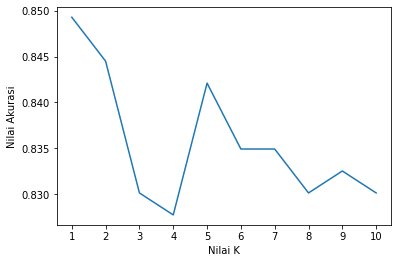

In [ ]:
from statistics import *

result = []
for i in range (1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    #Masukkan prediksi
    pred_knn = knn.predict(x_test)
    #Nilai prediksi 
    acurate = accuracy_score(y_test, pred_knn)
    print(acurate)
    result.append(acurate)
plt.plot(result)
plt.ylabel("Nilai Akurasi")
plt.xlabel("Nilai K")
plt.xticks(np.arange(10),('1','2','3','4','5','6','7','8','9','10'))
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#Menentukan hasil prediksi dari x test
y_pred = knn.predict(x_test)
y_pred

array([3, 5, 6, 3, 2, 6, 3, 4, 0, 6, 6, 2, 6, 2, 5, 5, 5, 5, 4, 3, 5, 0,
       6, 4, 5, 3, 2, 3, 4, 2, 2, 4, 0, 2, 6, 6, 4, 4, 3, 5, 3, 6, 6, 3,
       1, 3, 3, 5, 3, 5, 6, 0, 4, 6, 2, 0, 1, 2, 0, 0, 6, 5, 2, 0, 6, 6,
       2, 5, 2, 0, 5, 1, 1, 2, 5, 5, 6, 5, 1, 6, 0, 0, 4, 6, 2, 2, 4, 1,
       6, 3, 2, 1, 2, 2, 3, 4, 0, 2, 6, 1, 2, 6, 6, 6, 5, 6, 6, 3, 5, 3,
       2, 0, 1, 0, 6, 1, 5, 3, 4, 4, 4, 4, 3, 3, 6, 4, 3, 3, 1, 5, 5, 5,
       3, 3, 2, 3, 1, 3, 5, 4, 4, 1, 2, 2, 4, 4, 2, 4, 5, 4, 2, 3, 5, 3,
       3, 6, 0, 1, 0, 6, 1, 4, 0, 5, 0, 4, 1, 3, 6, 3, 4, 4, 2, 2, 1, 1,
       2, 5, 2, 2, 4, 1, 3, 1, 2, 4, 2, 1, 2, 4, 1, 0, 4, 6, 1, 0, 0, 2,
       1, 2, 2, 1, 6, 4, 6, 2, 6, 2, 0, 6, 1, 4, 4, 2, 4, 3, 2, 5, 3, 6,
       6, 3, 0, 6, 0, 3, 3, 2, 2, 6, 5, 5, 5, 2, 3, 6, 2, 4, 0, 0, 2, 6,
       4, 6, 5, 1, 3, 5, 2, 4, 4, 5, 0, 4, 3, 3, 6, 6, 4, 1, 0, 3, 6, 3,
       6, 6, 5, 3, 4, 5, 3, 6, 2, 0, 0, 4, 4, 4, 1, 4, 0, 5, 5, 0, 0, 6,
       3, 3, 5, 0, 2, 0, 1, 4, 4, 0, 5, 5, 5, 6, 0,

In [ ]:
#Menghitung confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix

#Menampilkan confusion matrix
print(confusion_matrix(y_test, y_pred))

[[41  3  0  0  0  1  1]
 [ 6 29  1  1  0  6  8]
 [ 1  1 65  1  0  4  3]
 [ 0  0  1 67  0  0  2]
 [ 0  0  0  0 60  0  0]
 [ 1  5  1  0  1 43  5]
 [ 1  3  4  0  1  1 50]]


In [ ]:
#Menampilkan hasil ketepatan prediksi menggunakan nilai precision
print(classification_report(y_test, y_pred))

#Menampilkan hasil nilai akurasi
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi = ",accuracy)

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        46
           1       0.71      0.57      0.63        51
           2       0.90      0.87      0.88        75
           3       0.97      0.96      0.96        70
           4       0.97      1.00      0.98        60
           5       0.78      0.77      0.77        56
           6       0.72      0.83      0.78        60

    accuracy                           0.85       418
   macro avg       0.84      0.84      0.84       418
weighted avg       0.85      0.85      0.85       418

Akurasi =  0.8492822966507177


# 1. Menggunakan Data 30-70

In [ ]:
#Import split train test 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

In [ ]:
#Mengubah skala data dengan mengaktifkan package dan menuliskan syntax

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Memanggil package KNN 
from sklearn.neighbors import KNeighborsClassifier

#Menampilkan hasil nilai akurasi
from sklearn.metrics import accuracy_score 

0.8341307814992025
0.8277511961722488
0.8070175438596491
0.8133971291866029
0.8149920255183413
0.8070175438596491
0.8133971291866029
0.8133971291866029
0.8086124401913876
0.7894736842105263


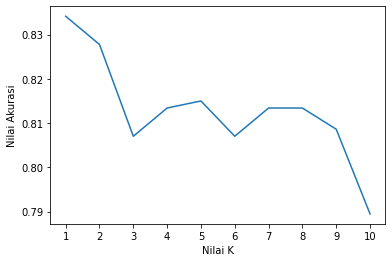

In [ ]:
from statistics import *

result = []
for i in range (1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    #Masukkan prediksi
    pred_knn = knn.predict(x_test)
    #Nilai prediksi 
    acurate = accuracy_score(y_test, pred_knn)
    print(acurate)
    result.append(acurate)
plt.plot(result)
plt.ylabel("Nilai Akurasi")
plt.xlabel("Nilai K")
plt.xticks(np.arange(10),('1','2','3','4','5','6','7','8','9','10'))
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#Menentukan hasil prediksi dari x test
y_pred = knn.predict(x_test)
y_pred

array([3, 5, 6, 3, 2, 6, 3, 4, 0, 6, 6, 0, 6, 2, 5, 5, 5, 5, 4, 3, 5, 0,
       6, 4, 5, 3, 2, 3, 4, 2, 2, 4, 0, 2, 6, 6, 4, 4, 3, 5, 3, 6, 6, 3,
       1, 3, 3, 5, 3, 5, 6, 0, 4, 6, 2, 0, 0, 2, 0, 0, 6, 5, 2, 0, 6, 6,
       2, 5, 2, 0, 5, 1, 1, 2, 5, 5, 6, 5, 1, 6, 0, 0, 4, 6, 2, 2, 4, 0,
       2, 3, 2, 1, 2, 2, 3, 4, 0, 2, 6, 1, 2, 6, 6, 6, 5, 6, 6, 3, 5, 3,
       2, 0, 1, 0, 6, 1, 5, 3, 4, 4, 4, 4, 3, 3, 5, 4, 3, 3, 1, 5, 5, 5,
       3, 3, 2, 3, 1, 3, 5, 4, 4, 1, 2, 2, 4, 4, 2, 4, 5, 4, 2, 3, 5, 3,
       3, 6, 0, 1, 0, 6, 1, 4, 0, 5, 0, 4, 1, 3, 6, 3, 4, 4, 2, 2, 1, 1,
       2, 5, 5, 2, 4, 1, 3, 1, 2, 4, 2, 1, 2, 4, 1, 0, 4, 6, 1, 0, 0, 2,
       1, 2, 2, 1, 6, 4, 6, 2, 6, 2, 0, 6, 1, 4, 4, 2, 4, 3, 2, 5, 3, 6,
       6, 3, 0, 6, 0, 3, 3, 2, 2, 6, 5, 5, 5, 2, 3, 6, 2, 4, 0, 0, 2, 6,
       4, 6, 5, 1, 3, 5, 2, 4, 4, 5, 0, 4, 3, 3, 6, 6, 4, 1, 0, 3, 6, 3,
       6, 6, 5, 3, 4, 5, 3, 6, 2, 0, 0, 4, 4, 4, 1, 4, 0, 5, 5, 0, 0, 6,
       3, 3, 5, 0, 2, 0, 1, 4, 4, 0, 5, 5, 5, 6, 0,

In [ ]:
#Menghitung confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix

#Menampilkan confusion matrix
print(confusion_matrix(y_test, y_pred))

[[73  4  0  0  0  1  1]
 [14 39  1  1  0 11 11]
 [ 2  1 99  1  0  6  4]
 [ 0  0  3 91  0  1  3]
 [ 0  0  0  0 92  0  0]
 [ 1  7  3  0  1 55 10]
 [ 2  4  7  0  1  3 74]]


In [ ]:
#Menampilkan hasil ketepatan prediksi menggunakan nilai precision
print(classification_report(y_test, y_pred))

#Menampilkan hasil nilai akurasi
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi = ",accuracy)

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        79
           1       0.71      0.51      0.59        77
           2       0.88      0.88      0.88       113
           3       0.98      0.93      0.95        98
           4       0.98      1.00      0.99        92
           5       0.71      0.71      0.71        77
           6       0.72      0.81      0.76        91

    accuracy                           0.83       627
   macro avg       0.82      0.82      0.82       627
weighted avg       0.83      0.83      0.83       627

Akurasi =  0.8341307814992025


# 1. Menggunakan Data 40-60

In [ ]:
#Import split train test 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=0)

In [ ]:
#Mengubah skala data dengan mengaktifkan package dan menuliskan syntax

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Memanggil package KNN 
from sklearn.neighbors import KNeighborsClassifier

#Menampilkan hasil nilai akurasi
from sklearn.metrics import accuracy_score 

0.8311377245508982
0.8203592814371258
0.822754491017964
0.8023952095808383
0.8023952095808383
0.8
0.8011976047904191
0.7868263473053893
0.7748502994011977
0.7724550898203593


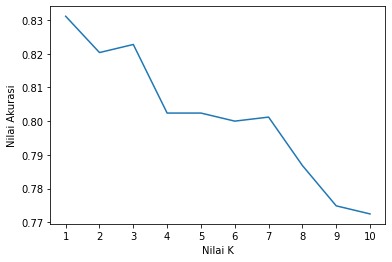

In [ ]:
from statistics import *

result = []
for i in range (1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    #Masukkan prediksi
    pred_knn = knn.predict(x_test)
    #Nilai prediksi 
    acurate = accuracy_score(y_test, pred_knn)
    print(acurate)
    result.append(acurate)
plt.plot(result)
plt.ylabel("Nilai Akurasi")
plt.xlabel("Nilai K")
plt.xticks(np.arange(10),('1','2','3','4','5','6','7','8','9','10'))
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#Menentukan hasil prediksi dari x test
y_pred = knn.predict(x_test)
y_pred

array([3, 5, 6, 3, 2, 6, 3, 4, 0, 6, 6, 0, 6, 2, 5, 5, 5, 5, 4, 3, 5, 0,
       6, 4, 5, 3, 2, 3, 4, 2, 2, 4, 0, 2, 6, 6, 4, 4, 3, 5, 3, 6, 6, 3,
       1, 3, 3, 5, 3, 5, 6, 0, 4, 6, 2, 0, 0, 2, 0, 0, 6, 5, 2, 0, 6, 6,
       2, 5, 2, 0, 5, 1, 1, 2, 5, 5, 6, 5, 1, 6, 0, 0, 4, 6, 2, 6, 4, 0,
       3, 3, 2, 1, 2, 2, 3, 4, 0, 2, 6, 1, 2, 6, 5, 6, 5, 6, 6, 3, 5, 3,
       2, 0, 1, 0, 6, 1, 5, 3, 4, 4, 4, 4, 3, 3, 5, 4, 3, 3, 1, 5, 5, 5,
       3, 3, 2, 3, 1, 3, 5, 4, 4, 1, 2, 2, 4, 4, 2, 4, 5, 4, 2, 3, 5, 3,
       3, 6, 0, 1, 0, 6, 1, 4, 0, 5, 0, 4, 1, 3, 6, 3, 4, 4, 2, 2, 1, 5,
       2, 5, 5, 2, 4, 1, 3, 1, 2, 4, 2, 1, 2, 4, 1, 0, 4, 6, 1, 0, 0, 2,
       1, 2, 2, 1, 6, 4, 6, 2, 6, 2, 0, 6, 1, 4, 4, 2, 4, 3, 2, 5, 3, 5,
       6, 3, 0, 6, 0, 3, 3, 2, 2, 6, 5, 5, 5, 2, 3, 6, 2, 4, 0, 0, 2, 6,
       4, 6, 5, 1, 3, 5, 2, 4, 4, 5, 0, 4, 3, 3, 6, 6, 4, 1, 0, 3, 6, 3,
       6, 6, 5, 3, 4, 5, 3, 6, 2, 0, 0, 4, 4, 4, 1, 4, 0, 5, 5, 0, 0, 6,
       3, 3, 5, 0, 2, 0, 1, 4, 4, 0, 5, 5, 5, 6, 0,

In [ ]:
#Menghitung confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix

#Menampilkan confusion matrix
print(confusion_matrix(y_test, y_pred))

[[111   5   0   0   0   2   1]
 [ 19  46   4   1   0  12  16]
 [  2   4 127   3   0   6   5]
 [  0   0   4 111   0   1   4]
 [  0   0   0   0 120   0   0]
 [  2  12   3   0   1  76  11]
 [  4   4   7   1   1   6 103]]


In [ ]:
#Menampilkan hasil ketepatan prediksi menggunakan nilai precision
print(classification_report(y_test, y_pred))

#Menampilkan hasil nilai akurasi
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi = ",accuracy)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       119
           1       0.65      0.47      0.54        98
           2       0.88      0.86      0.87       147
           3       0.96      0.93      0.94       120
           4       0.98      1.00      0.99       120
           5       0.74      0.72      0.73       105
           6       0.74      0.82      0.77       126

    accuracy                           0.83       835
   macro avg       0.82      0.82      0.82       835
weighted avg       0.83      0.83      0.83       835

Akurasi =  0.8311377245508982


# 1. Menggunakan Data 50-50

In [ ]:
#Import split train test 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.50, random_state=0)

In [ ]:
#Mengubah skala data dengan mengaktifkan package dan menuliskan syntax

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
#Memanggil package KNN 
from sklearn.neighbors import KNeighborsClassifier

#Menampilkan hasil nilai akurasi
from sklearn.metrics import accuracy_score 

0.8237547892720306
0.8007662835249042
0.7998084291187739
0.7902298850574713
0.7883141762452107
0.7758620689655172
0.7662835249042146
0.7557471264367817
0.7490421455938697
0.7538314176245211


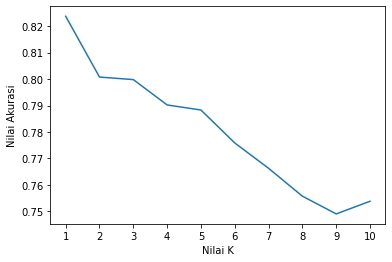

In [ ]:
from statistics import *

result = []
for i in range (1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    #Masukkan prediksi
    pred_knn = knn.predict(x_test)
    #Nilai prediksi 
    acurate = accuracy_score(y_test, pred_knn)
    print(acurate)
    result.append(acurate)
plt.plot(result)
plt.ylabel("Nilai Akurasi")
plt.xlabel("Nilai K")
plt.xticks(np.arange(10),('1','2','3','4','5','6','7','8','9','10'))
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
#Menentukan hasil prediksi dari x test
y_pred = knn.predict(x_test)
y_pred

array([3, 1, 6, ..., 4, 6, 0])

In [ ]:
#Menghitung confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix

#Menampilkan confusion matrix
print(confusion_matrix(y_test, y_pred))

[[127   9   0   0   0   4   1]
 [ 25  62  13   0   0  15  15]
 [  3   5 155   5   0   6   6]
 [  0   0   4 141   0   2   5]
 [  0   0   0   0 158   0   0]
 [  3  17   6   0   1  93   9]
 [  3   6   8   3   1   9 124]]


In [ ]:
#Menampilkan hasil ketepatan prediksi menggunakan nilai precision
print(classification_report(y_test, y_pred))

#Menampilkan hasil nilai akurasi
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi = ",accuracy)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       141
           1       0.63      0.48      0.54       130
           2       0.83      0.86      0.85       180
           3       0.95      0.93      0.94       152
           4       0.99      1.00      0.99       158
           5       0.72      0.72      0.72       129
           6       0.78      0.81      0.79       154

    accuracy                           0.82      1044
   macro avg       0.81      0.81      0.81      1044
weighted avg       0.82      0.82      0.82      1044

Akurasi =  0.8237547892720306
